<a href="https://colab.research.google.com/github/Zahzull/dataset-datamining/blob/main/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('Employee_Salary_Dataset.csv')
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, -1].values

In [9]:
X

array([[ 5, 28],
       [ 1, 21],
       [ 3, 23],
       [ 2, 22],
       [ 1, 17],
       [25, 62],
       [19, 54],
       [ 2, 21],
       [10, 36],
       [15, 54],
       [ 4, 26],
       [ 6, 29],
       [14, 39],
       [11, 40],
       [ 2, 23],
       [ 4, 27],
       [10, 34],
       [15, 54],
       [ 2, 21],
       [10, 36],
       [15, 54],
       [ 4, 26],
       [ 5, 29],
       [ 1, 21],
       [ 4, 23],
       [ 3, 22],
       [ 1, 18],
       [27, 62],
       [19, 54],
       [ 2, 21],
       [10, 34],
       [15, 54],
       [20, 55],
       [19, 53],
       [16, 49]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
X_train

array([[27, 62],
       [ 3, 22],
       [16, 49],
       [20, 55],
       [ 1, 18],
       [10, 34],
       [10, 36],
       [11, 40],
       [25, 62],
       [15, 54],
       [ 2, 23],
       [15, 54],
       [ 4, 23],
       [ 1, 21],
       [14, 39],
       [19, 54],
       [ 1, 21],
       [ 1, 17],
       [ 2, 21],
       [ 4, 26],
       [10, 36],
       [15, 54],
       [ 2, 21],
       [19, 53],
       [ 2, 22],
       [ 5, 28]])

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[ 2.17711853,  1.69271349],
       [-0.85529656, -0.9465999 ],
       [ 0.78726161,  0.83493664],
       [ 1.29266413,  1.23083365],
       [-1.10799782, -1.21053124],
       [ 0.02915784, -0.15480588],
       [ 0.02915784, -0.02284021],
       [ 0.15550847,  0.24109113],
       [ 1.92441727,  1.69271349],
       [ 0.66091098,  1.16485081],
       [-0.98164719, -0.88061706],
       [ 0.66091098,  1.16485081],
       [-0.72894594, -0.88061706],
       [-1.10799782, -1.01258273],
       [ 0.53456035,  0.17510829],
       [ 1.1663135 ,  1.16485081],
       [-1.10799782, -1.01258273],
       [-1.10799782, -1.27651407],
       [-0.98164719, -1.01258273],
       [-0.72894594, -0.68266856],
       [ 0.02915784, -0.02284021],
       [ 0.66091098,  1.16485081],
       [-0.98164719, -1.01258273],
       [ 1.1663135 ,  1.09886798],
       [-0.98164719, -0.9465999 ],
       [-0.60259531, -0.55070289]])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
print(y_pred)
print(y_test)

[  6000 650000  61500 800000   7500   7500   7500   7500   8900]
[   6100 6570000  930000 5000000 6845000   87000  250000  170000 1400000]


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]]


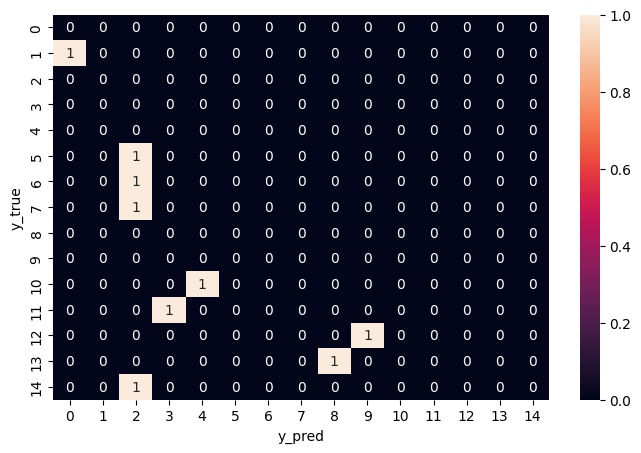

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [19]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        6000       0.00      0.00      0.00       0.0
        6100       0.00      0.00      0.00       1.0
        7500       0.00      0.00      0.00       0.0
        8900       0.00      0.00      0.00       0.0
       61500       0.00      0.00      0.00       0.0
       87000       0.00      0.00      0.00       1.0
      170000       0.00      0.00      0.00       1.0
      250000       0.00      0.00      0.00       1.0
      650000       0.00      0.00      0.00       0.0
      800000       0.00      0.00      0.00       0.0
      930000       0.00      0.00      0.00       1.0
     1400000       0.00      0.00      0.00       1.0
     5000000       0.00      0.00      0.00       1.0
     6570000       0.00      0.00      0.00       1.0
     6845000       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

<ipython-input-22-ca4ce4aec358>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


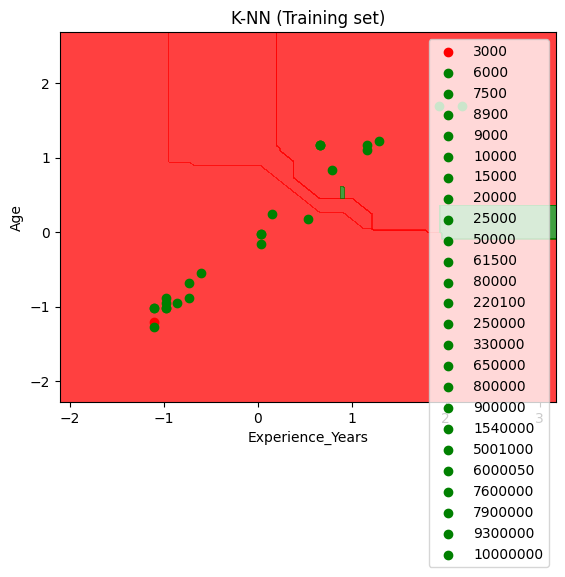

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Experience_Years')
plt.ylabel('Age')
plt.legend()
plt.show()

<ipython-input-23-13f155b5d3cf>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


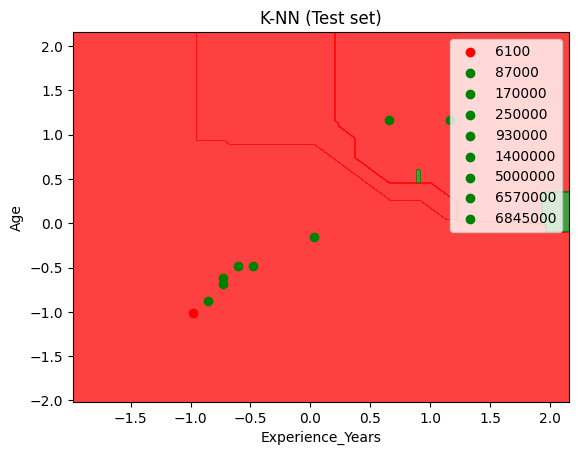

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Experience_Years')
plt.ylabel('Age')
plt.legend()
plt.show()